In [3]:
import networkx as nx
from node2vec import Node2Vec
import matplotlib.pyplot as plt
from matplotlib import cm
#plt.figure(figsize=(100,100), dpi=1)
plt.rcParams['figure.dpi'] = 40
plt.rcParams['figure.figsize'] = [200, 200]

In [4]:
import json
with open("line.json", encoding='utf-8') as file:
    data = json.load(file)
edge_tuples = [(edge['source'], edge['target']) for edge in data['links']]
data.keys(), len(data['nodes']), data['nodes'][0], data['links'][0], edge_tuples[0]

(dict_keys(['links', 'nodes']),
 1000,
 {'name': '0'},
 {'source': 0, 'target': 500},
 (0, 500))

In [5]:
G = nx.Graph()
nodes = list(range(len(data['nodes'])))
nodes_color =  [1 if index<19 or (index< 519 and index>=500) else 0 for index in nodes]
G.add_nodes_from(nodes)
G.add_edges_from(edge_tuples)

pos=nx.spring_layout(G)
nx.draw(G, pos)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

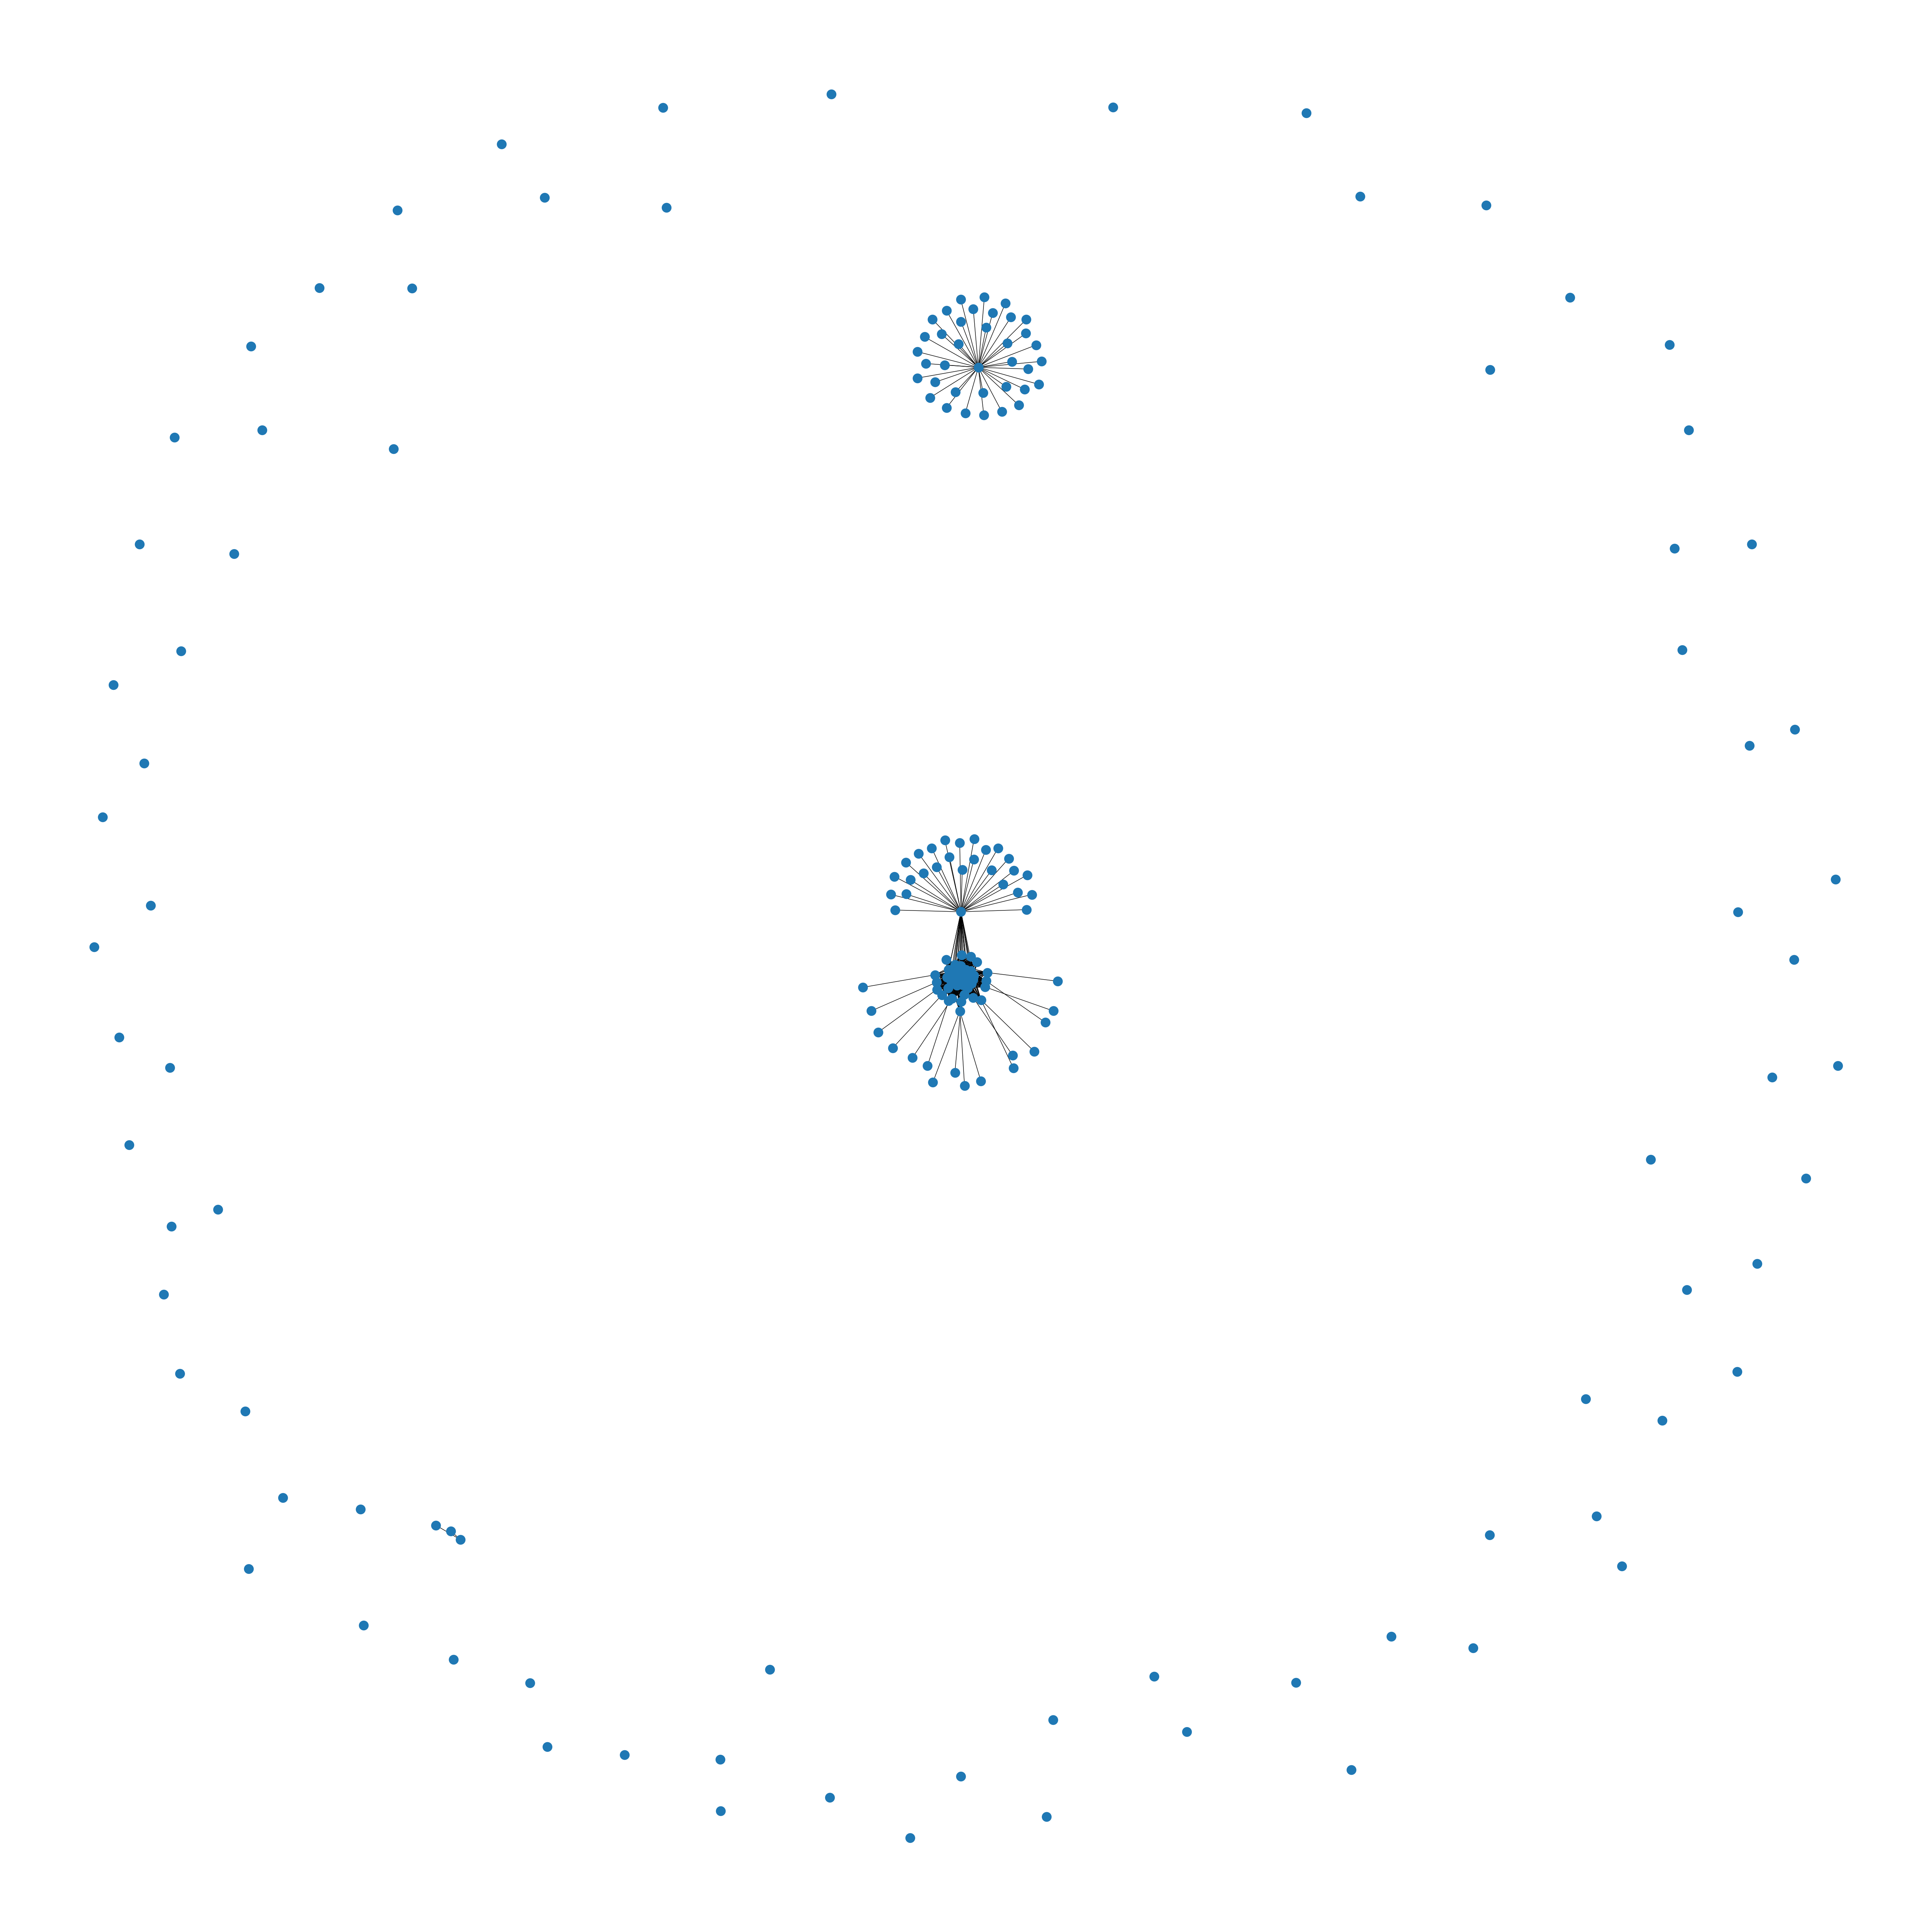

In [6]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [50, 50]

H = G.subgraph(list(range(100)) + list(range(500,600)))
pos=nx.spring_layout(H)
nx.draw(H)
plt.show

pos=nx.bipartite_layout(list(range(100)))
nx.draw(H, pos)
plt.show

In [7]:
node2vec = Node2Vec(G, dimensions=20, walk_length=20, num_walks=40, workers=8)  # Use temp_folder for big graphs

# Embed nodes
model = node2vec.fit(window=20, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `diemnsions` and `workers` are automatically passed (from the Node2Vec constructor)

X = [model.wv[str(index)] for index in nodes]
print(type(model.wv)), len(X), X[0], X[1]
# Look for most similar nodes
#print(model.wv.most_similar('2')) # Output node names are always strings


Computing transition probabilities: 100%|██████████| 1000/1000 [00:00<00:00, 4042.76it/s]


<class 'gensim.models.keyedvectors.Word2VecKeyedVectors'>


(None,
 1000,
 array([ 4.807809  ,  0.17574449,  4.5001755 , -2.084811  ,  0.6828544 ,
         0.9634398 ,  1.5370865 ,  0.35731682, -0.637629  ,  0.45898044,
        -1.3679898 ,  2.2198362 , -3.0737054 ,  0.42866543,  0.9998386 ,
        -2.0797076 ,  0.8598058 ,  2.3202295 , -0.08709269, -0.4523207 ],
       dtype=float32),
 array([ 4.5390286 ,  0.09142361,  4.3184896 , -1.9548904 ,  0.79528654,
         0.964848  ,  1.2830533 ,  0.36135498, -0.6014402 ,  0.47555286,
        -1.3874525 ,  2.124791  , -3.0358465 ,  0.25887984,  0.9109107 ,
        -1.7432897 ,  0.9072054 ,  2.1992483 ,  0.15114044, -0.2509158 ],
       dtype=float32))

import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.8)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
print(labels)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_, kmeans.cluster_centers_

In [19]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from node2vec.edges import HadamardEmbedder
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)
edges_kv = edges_embs.as_keyed_vectors()

print(edge_tuples[0:10])
X = [edges_kv[key] for key in edges_kv.wv.vocab.keys()]

bandwidth = estimate_bandwidth(X, quantile=0.8)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
print(labels)

Generating edge features: 100%|██████████| 500500/500500.0 [00:03<00:00, 147702.56it/s]


[(0, 500), (0, 501), (0, 502), (0, 503), (0, 504), (0, 505), (0, 506), (0, 507), (0, 508), (0, 509)]


/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


number of estimated clusters : 614
[19 19 22 ...  0  0  0]
